# ABOUT ME

# My name is Usama Bin Ali.
I am an MPhil student in Bioinformatics at Hazara University, Mansehra.

I am passionate about research in computational biology, bioinformatics, and disease analysis. My academic interest is focused on using modern computational tools and protein-based models to understand complex human diseases.

# My research work is supervised by Dr. Ashfaq Ahmad, who is guiding me throughout my research journey.

Currently, I am working on a research project titled

Assessing the Impact of Alzheimer’s Disease on Cardiovascular Conditions Using Protein Large Language Models.

# STEP 1: Environment Setup

In this step, we install all the required Python libraries that are necessary for our research and data analysis work. These libraries help us handle protein sequences, biological data, machine learning, and visualization

# Purpose of Each Library


# fair-esm
This library is used for protein language models developed by Meta AI. It helps us analyze protein sequences and extract meaningful representations, which are important for understanding disease-related protein behavior.

# Biopython
Biopython provides tools for biological sequence analysis, such as reading, writing, and processing protein and DNA sequences.

Pandas
Pandas is used for data handling and management. It helps us organize datasets into tables, clean data, and perform efficient analysis.

# Matplotlib
This library is used for data visualization. It allows us to create graphs and plots to better understand patterns and results in our data.

# Scikit-learn
Scikit-learn is used for machine learning and statistical modeling. It helps in training models, evaluating performance, and analyzing results.

In [17]:
# ==========================
# STEP 1: Setup
# ==========================
!pip install fair-esm biopython pandas matplotlib scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 73.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


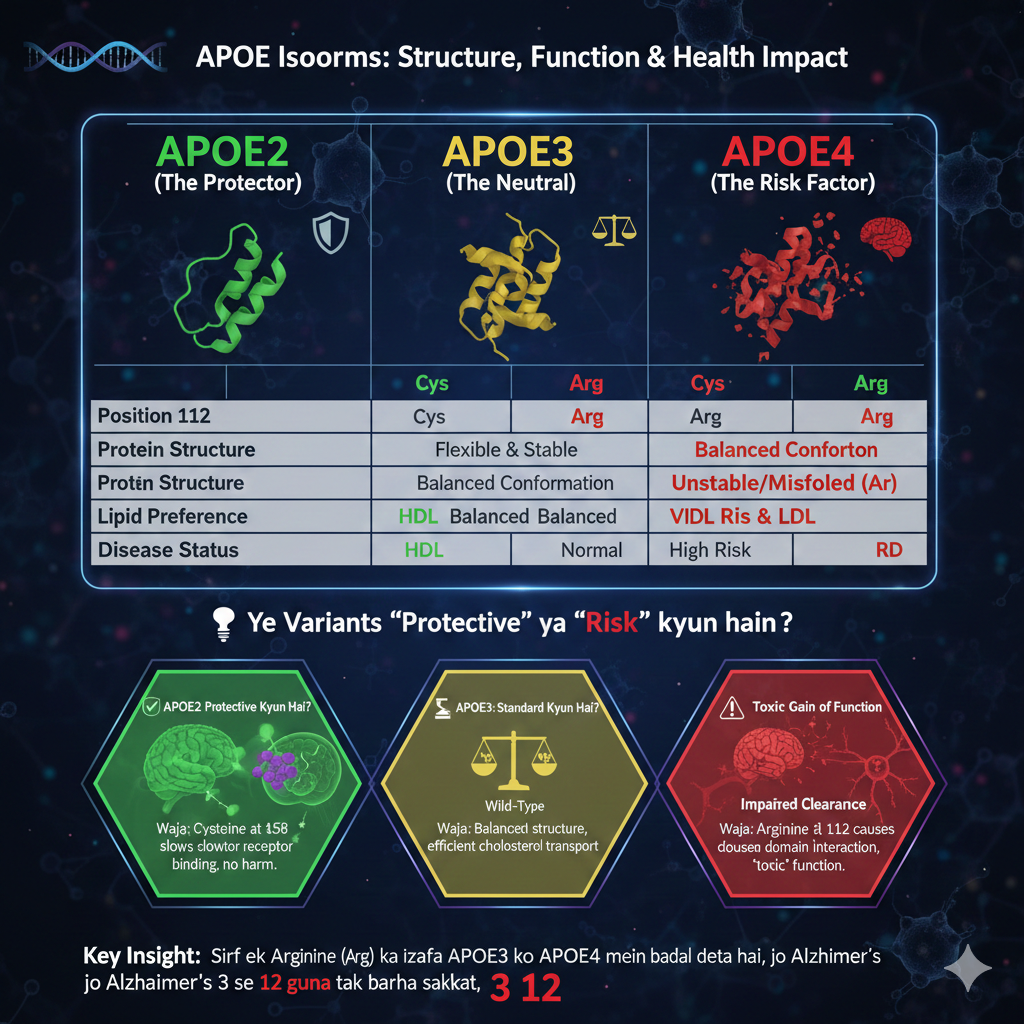

In [3]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/correct apoe image.png'

# Display the image
Image(filename=image_path)

In [19]:
# --- Step 2: Load the NACC dataset ---
import pandas as pd

# Replace with your actual file path inside Drive
file_path = '/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv'  # <-- EDIT THIS PATH

# Load the file (adjust separator if TSV or Excel)
df = pd.read_csv(file_path)

# --- Step 3: Print basic info and column names ---
print("✅ File loaded successfully!")
print(f"Total rows: {len(df)}")
print("\nColumn Titles:\n")
for col in df.columns:
    print(col)


✅ File loaded successfully!
Total rows: 40686

Column Titles:

NACCID
SEX
BIRTHYR
NACCAPOE
DEMENTED
CVHATT
HATTMULT
CVAFIB
CVANGIO
CVBYPASS
CVPACDEF
CVPACE
CVCHF
CVANGINA
CVHVALVE
CVOTHR
CVOTHRX
MYOINF
CONGHRT
AFIBRILL
ANGINA
ANGIOCP
ANGIOPCI
PACEMAKE
HVALVE
CBSTROKE
STROKMUL
NACCSTYR
CBTIA
TIAMULT
NACCTIYR
HXSTROKE
PREVSTK
STROKE
STROKIF
STROKDEC
STKIMAG
CVD
CVDIF
VASC
VASCIF
VASCPS
VASCPSIF


# Total dataset
This dataset consists of 40,686 participant records containing detailed demographic, genetic, neurological, and cardiovascular health data. It includes APOE genotype information, dementia status, and multiple indicators of cardiovascular and cerebrovascular conditions such as stroke, heart disease, and vascular disorders. The data supports comprehensive analysis of the association between Alzheimer’s disease and cardiovascular health.

# load the dataset

In [20]:
import pandas as pd
import numpy as np

# ==========================
# STEP 1: Load Dataset
# ==========================
nacc = pd.read_csv("/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv", dtype={'NACCID': str}, low_memory=False)

print(f"Original rows: {len(nacc)}")
print(f"Unique NACCIDs BEFORE deduplication: {nacc['NACCID'].nunique()}")

# ==========================
# STEP 2: Deduplicate by NACCID
# ==========================
# Keep only first occurrence for each subject (ensures 1 row per subject)
nacc = nacc.sort_values(by="NACCID").drop_duplicates(subset="NACCID", keep="first")
print(f"Rows AFTER deduplication: {len(nacc)}")
print(f"Unique NACCIDs AFTER deduplication: {nacc['NACCID'].nunique()}")

# ==========================
# STEP 3: Define Columns to Keep
# ==========================
columns_to_keep = [
    # Demographics & APOE
    "NACCID", "SEX", "BIRTHYR", "NACCAPOE", "DEMENTED",

    # Cardiovascular & Cerebrovascular
    "CVHATT","HATTMULT","CVAFIB","CVANGIO","CVBYPASS","CVPACDEF","CVPACE",
    "CVCHF","CVANGINA","CVHVALVE","CVOTHR","CVOTHRX","MYOINF","CONGHRT",
    "AFIBRILL","ANGINA","ANGIOCP","ANGIOPCI","PACEMAKE","HVALVE",
    "CBSTROKE","STROKMUL","NACCSTYR","CBTIA","TIAMULT","NACCTIYR","HXSTROKE",
    "PREVSTK","STROKE","STROKIF","STROKDEC","STKIMAG","CVD","CVDIF","VASC",
    "VASCIF","VASCPS","VASCPSIF",
]

# Keep only columns that exist in the dataset
columns_to_keep = [col for col in columns_to_keep if col in nacc.columns]
filtered_df = nacc[columns_to_keep].copy()

# ==========================
# STEP 4: Handle Missing Values
# ==========================
filtered_df = filtered_df.replace([9, 99, -4, -8], np.nan)

# Drop rows without APOE info
filtered_df = filtered_df.dropna(subset=["NACCAPOE"])

# ==========================
# STEP 5: Save Clean Dataset
# ==========================
filtered_df.to_csv("NACC_APOE_CVD_filtered.csv", index=False)
print(f"✅ Clean dataset saved: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns")

# ==========================
# STEP 6: Quick Descriptive Stats
# ==========================
print("\n📊 Basic Descriptive Statistics (Counts of Each Condition):")
numeric_df = filtered_df.select_dtypes(include=[np.number])
condition_counts = numeric_df.apply(pd.Series.value_counts).T.fillna(0).astype(int)

if 1 in condition_counts.columns:
    top_conditions = condition_counts.sort_values(by=1, ascending=False).head(20)
else:
    top_conditions = condition_counts.head(20)

display(top_conditions)

print("\nPreview of Cleaned Dataset:")
display(filtered_df.head())


Original rows: 40686
Unique NACCIDs BEFORE deduplication: 40686
Rows AFTER deduplication: 40686
Unique NACCIDs AFTER deduplication: 40686
✅ Clean dataset saved: 40686 rows, 43 columns

📊 Basic Descriptive Statistics (Counts of Each Condition):


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,1896.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,8888.0,9999.0
NACCAPOE,0,20314,12776,3630,2737,1051,178,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SEX,0,17659,23027,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEMENTED,26044,14642,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVOTHR,26185,2199,1152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVAFIB,27204,1692,640,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVD,17321,1443,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AFIBRILL,17323,1351,0,0,0,0,0,0,90,0,...,0,0,0,0,0,0,0,0,0,0
STROKE,21010,912,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVPACE,21054,742,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVANGIO,27499,730,1395,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Preview of Cleaned Dataset:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,STROKE,STROKIF,STROKDEC,STKIMAG,CVD,CVDIF,VASC,VASCIF,VASCPS,VASCPSIF
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,8.0,8.0,0.0,7.0,NaN,NaN,NaN,NaN
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0


# Dataset Cleaning and Validation Summary

# Original dataset size: 40,686 rows

# Unique participant IDs (NACCID) before deduplication: 40,686

# Rows after deduplication: 40,686

# Unique participant IDs after deduplication: 40,686

# No duplicate records were detected in the dataset. Each row represents a unique participant.

# ✅ The final cleaned dataset contains 40,686 rows and 43 columns, ensuring data integrity and readiness for further analysis.

# Mapping NACCAPOE Codes to APOE Genotypes

In this step, the numeric NACCAPOE codes are converted into their corresponding true APOE genotypes. This transformation makes the genetic information more biologically meaningful and easier to interpret for analysis.

# Each numeric code is mapped to a standard APOE allele combination (ε2, ε3, ε4). The mapped genotypes are stored in a new column called APOE_Label.

# Codes 7, 8, and 9 represent missing or unknown genotype information and are therefore left as NaN, as they were handled earlier during data cleaning.

After mapping, the distribution of APOE genotypes is displayed, excluding missing values, and the total number of missing genotypes is reported. This step ensures accurate representation of APOE genetic variability, which is essential for studying its role in Alzheimer’s disease and cardiovascular conditions.

In [21]:
# ==========================
# STEP 3: Map NACCAPOE to True Genotype
# ==========================
apoe_map = {
    1: "ε2/ε2",
    2: "ε2/ε3",
    3: "ε3/ε3",
    4: "ε2/ε4",
    5: "ε3/ε4",
    6: "ε4/ε4"
    # 7, 8, 9 will remain NaN (already handled earlier)
}

filtered_df["APOE_Label"] = filtered_df["NACCAPOE"].map(apoe_map)

print("APOE Genotype Distribution (excluding missing):")
print(filtered_df["APOE_Label"].value_counts(dropna=True))
print("\nNumber of missing APOE genotypes:", filtered_df["APOE_Label"].isna().sum())


APOE Genotype Distribution (excluding missing):
APOE_Label
ε2/ε2    20314
ε2/ε3    12776
ε3/ε3     3630
ε2/ε4     2737
ε3/ε4     1051
ε4/ε4      178
Name: count, dtype: int64

Number of missing APOE genotypes: 0


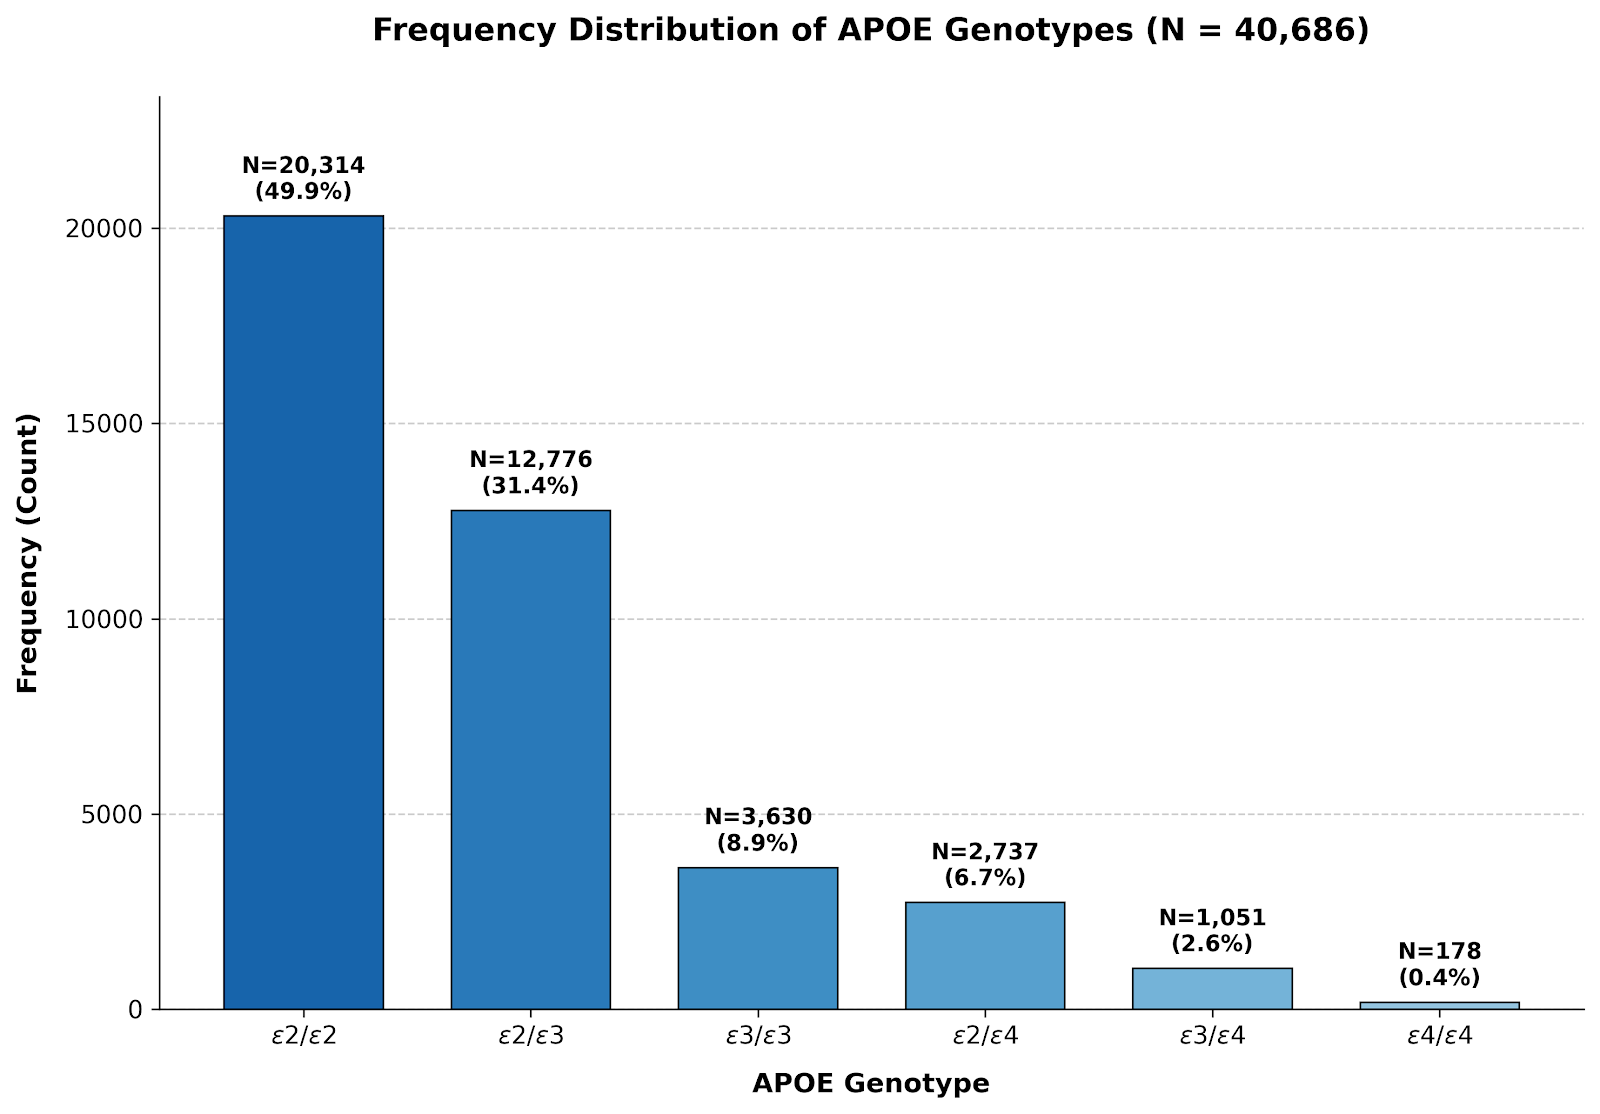

In [ ]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/apoe distr pic.png'

# Display the image
Image(filename=image_path)


# STEP 4: APOE Isoform Sequence Generation

# In this step, the reference APOE protein sequence is downloaded from UniProt and parsed using Biopython. Residues 112 and 158 of the mature protein are identified to determine the reference isoform. Based on these positions, the remaining APOE isoforms (APOE2, APOE3, APOE4) are generated by applying targeted amino acid substitutions. All isoform sequences are saved in APOE_isoforms.fasta, providing accurate, standardized sequences for downstream structural and computational analyses

In [22]:
from urllib.request import urlopen
from Bio import SeqIO

# ==========================
# STEP 4: Get APOE Reference Protein Sequence
# ==========================
url = "https://rest.uniprot.org/uniprotkb/P02649.fasta"
fasta_str = urlopen(url).read().decode()

with open("APOE.fasta", "w") as f:
    f.write(fasta_str)

record = list(SeqIO.parse("APOE.fasta", "fasta"))[0]
apoe_seq = str(record.seq)

print(f"✅ Downloaded APOE reference sequence: {record.id}")
print(f"APOE reference length: {len(apoe_seq)} aa")

# Adjust for signal peptide (offset = 18)
offset = 18
res_112 = apoe_seq[111 + offset]
res_158 = apoe_seq[157 + offset]

print(f"Residue 112 (mature): {res_112}")
print(f"Residue 158 (mature): {res_158}")

def mutate_sequence(seq, mutations):
    seq_list = list(seq)
    for pos, aa in mutations.items():
        true_pos = pos + offset  # adjust for UniProt numbering
        original = seq_list[true_pos - 1]
        seq_list[true_pos - 1] = aa
        print(f"Mutation applied at position {pos} (UniProt {true_pos}): {original} → {aa}")
    return "".join(seq_list)

# Determine isoform type
if res_112 == "C" and res_158 == "R":
    print("Reference appears to be APOE3 (Cys112, Arg158)")
    apoe3_seq = apoe_seq
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "C" and res_158 == "C":
    print("Reference appears to be APOE2 (Cys112, Cys158)")
    apoe2_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe2_seq, {158: "R"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "R" and res_158 == "R":
    print("Reference appears to be APOE4 (Arg112, Arg158)")
    apoe4_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe4_seq, {112: "C"})
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})

else:
    raise ValueError(f"Unexpected residue combination: 112={res_112}, 158={res_158}")

# Store isoforms
isoforms = {"APOE2": apoe2_seq, "APOE3": apoe3_seq, "APOE4": apoe4_seq}

with open("APOE_isoforms.fasta", "w") as f:
    for name, seq in isoforms.items():
        f.write(f">{name}\n{seq}\n")

print("\n✅ APOE isoform sequences saved to APOE_isoforms.fasta")


✅ Downloaded APOE reference sequence: sp|P02649|APOE_HUMAN
APOE reference length: 317 aa
Residue 112 (mature): C
Residue 158 (mature): R
Reference appears to be APOE3 (Cys112, Arg158)
Mutation applied at position 158 (UniProt 176): R → C
Mutation applied at position 112 (UniProt 130): C → R

✅ APOE isoform sequences saved to APOE_isoforms.fasta


# next step
# Generate Protein Embeddings:

 Loaded the ESM-2 protein language model and generated numerical embeddings for each APOE isoform.

# Map Patients to Embeddings:

 Assigned embeddings to patients based on APOE genotype, averaging embeddings for heterozygous genotypes, and using NaN for missing genotypes.

# Save Final Dataset:
 Expanded embeddings into individual columns, merged with clinical/genetic data, and saved as NACC_with_APOE_embeddings.csv for downstream analyses

In [23]:
import torch
import esm

# ==========================
# STEP 6: Load ESM-2 Model and Generate Embeddings
# ==========================
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()

def get_embedding(seq):
    data = [("protein", seq)]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=False)
    token_representations = results["representations"][33]
    return token_representations.mean(1).cpu().numpy().flatten()

embeddings = {name: get_embedding(seq) for name, seq in isoforms.items()}
print(f"Generated embeddings: {list(embeddings.keys())}")

# ==========================
# STEP 7: Link Patients to Correct Embedding
# ==========================
def assign_embedding(row):
    if row["APOE_Label"] == "ε2/ε2":
        return embeddings["APOE2"]
    elif row["APOE_Label"] == "ε3/ε3":
        return embeddings["APOE3"]
    elif row["APOE_Label"] == "ε4/ε4":
        return embeddings["APOE4"]
    elif row["APOE_Label"] == "ε2/ε3":
        return (embeddings["APOE2"] + embeddings["APOE3"]) / 2
    elif row["APOE_Label"] == "ε2/ε4":
        return (embeddings["APOE2"] + embeddings["APOE4"]) / 2
    elif row["APOE_Label"] == "ε3/ε4":
        return (embeddings["APOE3"] + embeddings["APOE4"]) / 2
    else:
        return np.full_like(embeddings["APOE3"], np.nan)

filtered_df["APOE_Embedding"] = filtered_df.apply(assign_embedding, axis=1)

# ==========================
# STEP 8: Save Final Dataset
# ==========================
# Expand embeddings into separate columns
embedding_dim = len(embeddings["APOE3"])
embedding_df = pd.DataFrame(filtered_df["APOE_Embedding"].tolist(),
                            columns=[f"APOE_emb_{i}" for i in range(embedding_dim)])
final_df = pd.concat([filtered_df.reset_index(drop=True).drop(columns=["APOE_Embedding"]),
                      embedding_df], axis=1)

final_df.to_csv("NACC_with_APOE_embeddings.csv", index=False)
print(f"Final dataset saved with shape: {final_df.shape}")
final_df.head()

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt
Generated embeddings: ['APOE2', 'APOE3', 'APOE4']
Final dataset saved with shape: (40686, 1324)


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211


### Impute Missing Values with Mean

This step identifies all numerical columns in the `final_df` DataFrame and replaces any missing values (NaN) with the mean of their respective columns. This is a common practice to handle missing data, especially for numerical features, to prevent issues in downstream analysis or model training.

In [7]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Check for NaN Values
Check: Ensure that your DataFrame actually has missing values

In [8]:
print(data.isnull().sum())

NACCID          0
SEX             0
BIRTHYR         0
NACCAPOE        0
DEMENTED        0
CVHATT      11104
HATTMULT    32973
CVAFIB      11150
CVANGIO     11062
CVBYPASS    11053
CVPACDEF    32944
CVPACE      18785
CVCHF       11088
CVANGINA    32948
CVHVALVE    32948
CVOTHR      11150
CVOTHRX     37339
MYOINF      21922
CONGHRT     21922
AFIBRILL    21922
ANGINA      21922
ANGIOCP     21922
ANGIOPCI    21922
PACEMAKE    21922
HVALVE      21922
CBSTROKE    11133
STROKMUL    32982
NACCSTYR      167
CBTIA       11296
TIAMULT     33036
NACCTIYR      380
HXSTROKE    19938
PREVSTK     21922
STROKE      18764
STROKIF     18764
STROKDEC    21922
STKIMAG     22012
CVD         21922
CVDIF       21922
VASC        18764
VASCIF      18764
VASCPS      25347
VASCPSIF    25390
dtype: int64


# Complete Code with Checks

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Use SimpleImputer to impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Impute the values
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the imputed data
print(data_imputed.head())

Missing values in each column:
NACCID          0
SEX             0
BIRTHYR         0
NACCAPOE        0
DEMENTED        0
CVHATT      11104
HATTMULT    32973
CVAFIB      11150
CVANGIO     11062
CVBYPASS    11053
CVPACDEF    32944
CVPACE      18785
CVCHF       11088
CVANGINA    32948
CVHVALVE    32948
CVOTHR      11150
CVOTHRX     37339
MYOINF      21922
CONGHRT     21922
AFIBRILL    21922
ANGINA      21922
ANGIOCP     21922
ANGIOPCI    21922
PACEMAKE    21922
HVALVE      21922
CBSTROKE    11133
STROKMUL    32982
NACCSTYR      167
CBTIA       11296
TIAMULT     33036
NACCTIYR      380
HXSTROKE    19938
PREVSTK     21922
STROKE      18764
STROKIF     18764
STROKDEC    21922
STKIMAG     22012
CVD         21922
CVDIF       21922
VASC        18764
VASCIF      18764
VASCPS      25347
VASCPSIF    25390
dtype: int64
   SEX  BIRTHYR  NACCAPOE  DEMENTED  CVHATT  HATTMULT  CVAFIB  CVANGIO  \
0  2.0   1944.0       1.0       0.0     0.0  7.732141     0.0      0.0   
1  2.0   1935.0       4.0       0.

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv')

# Check for missing values before imputation
print("Missing values in each column before imputation:")
print(data.isnull().sum())

# Select only numeric columns for imputation
data_numeric = data.select_dtypes(include=['number'])

# Use SimpleImputer to impute missing values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Check for missing values after imputation
print("\nMissing values in each column after imputation:")
print(data_imputed.isnull().sum())

# Display the first few rows of the imputed data
print("\nFirst few rows of the imputed dataset:")
print(data_imputed.head())

Missing values in each column before imputation:
NACCID          0
SEX             0
BIRTHYR         0
NACCAPOE        0
DEMENTED        0
CVHATT      11104
HATTMULT    32973
CVAFIB      11150
CVANGIO     11062
CVBYPASS    11053
CVPACDEF    32944
CVPACE      18785
CVCHF       11088
CVANGINA    32948
CVHVALVE    32948
CVOTHR      11150
CVOTHRX     37339
MYOINF      21922
CONGHRT     21922
AFIBRILL    21922
ANGINA      21922
ANGIOCP     21922
ANGIOPCI    21922
PACEMAKE    21922
HVALVE      21922
CBSTROKE    11133
STROKMUL    32982
NACCSTYR      167
CBTIA       11296
TIAMULT     33036
NACCTIYR      380
HXSTROKE    19938
PREVSTK     21922
STROKE      18764
STROKIF     18764
STROKDEC    21922
STKIMAG     22012
CVD         21922
CVDIF       21922
VASC        18764
VASCIF      18764
VASCPS      25347
VASCPSIF    25390
dtype: int64

Missing values in each column after imputation:
SEX         0
BIRTHYR     0
NACCAPOE    0
DEMENTED    0
CVHATT      0
HATTMULT    0
CVAFIB      0
CVANGIO     0
CVB

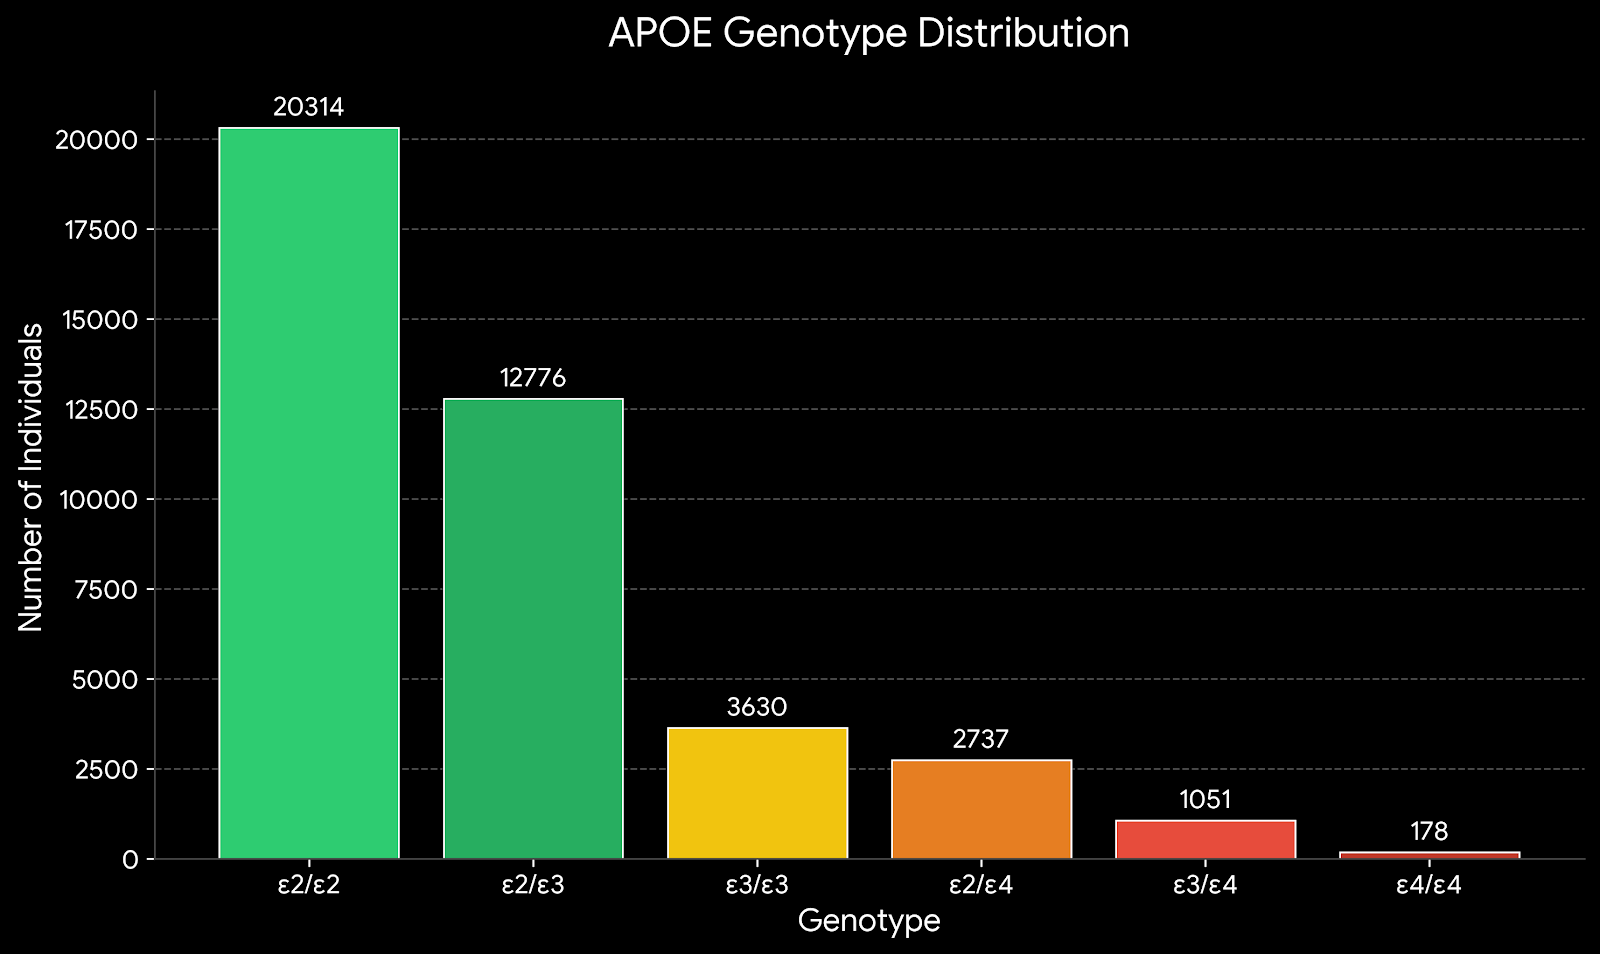

In [ ]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/Code_Generated_Image.png'

# Display the image
Image(filename=image_path)

# Visualization of Cardiovascular Conditions Across APOE Genotypes
Purpose

This analysis aims to visually compare the distribution of major cardiovascular conditions across different APOE genotypes. By stratifying patients based on their APOE allele combinations, the plot highlights potential genotype-specific differences in cardiovascular disease prevalence.

# Selected Cardiovascular Conditions

The visualization focuses on clinically relevant cardiovascular outcomes, including:

Hypertension

Stroke

Myocardial Infarction

Heart Failure

Angina Pectoris

Only variables with valid, non-missing data were included to ensure reliable and interpretable results

✅ Missing numerical values in plot_df imputed for visualization.


/tmp/ipython-input-4029557926.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)
/tmp/ipython-input-4029557926.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)
/tmp/ipython-input-4029557926.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

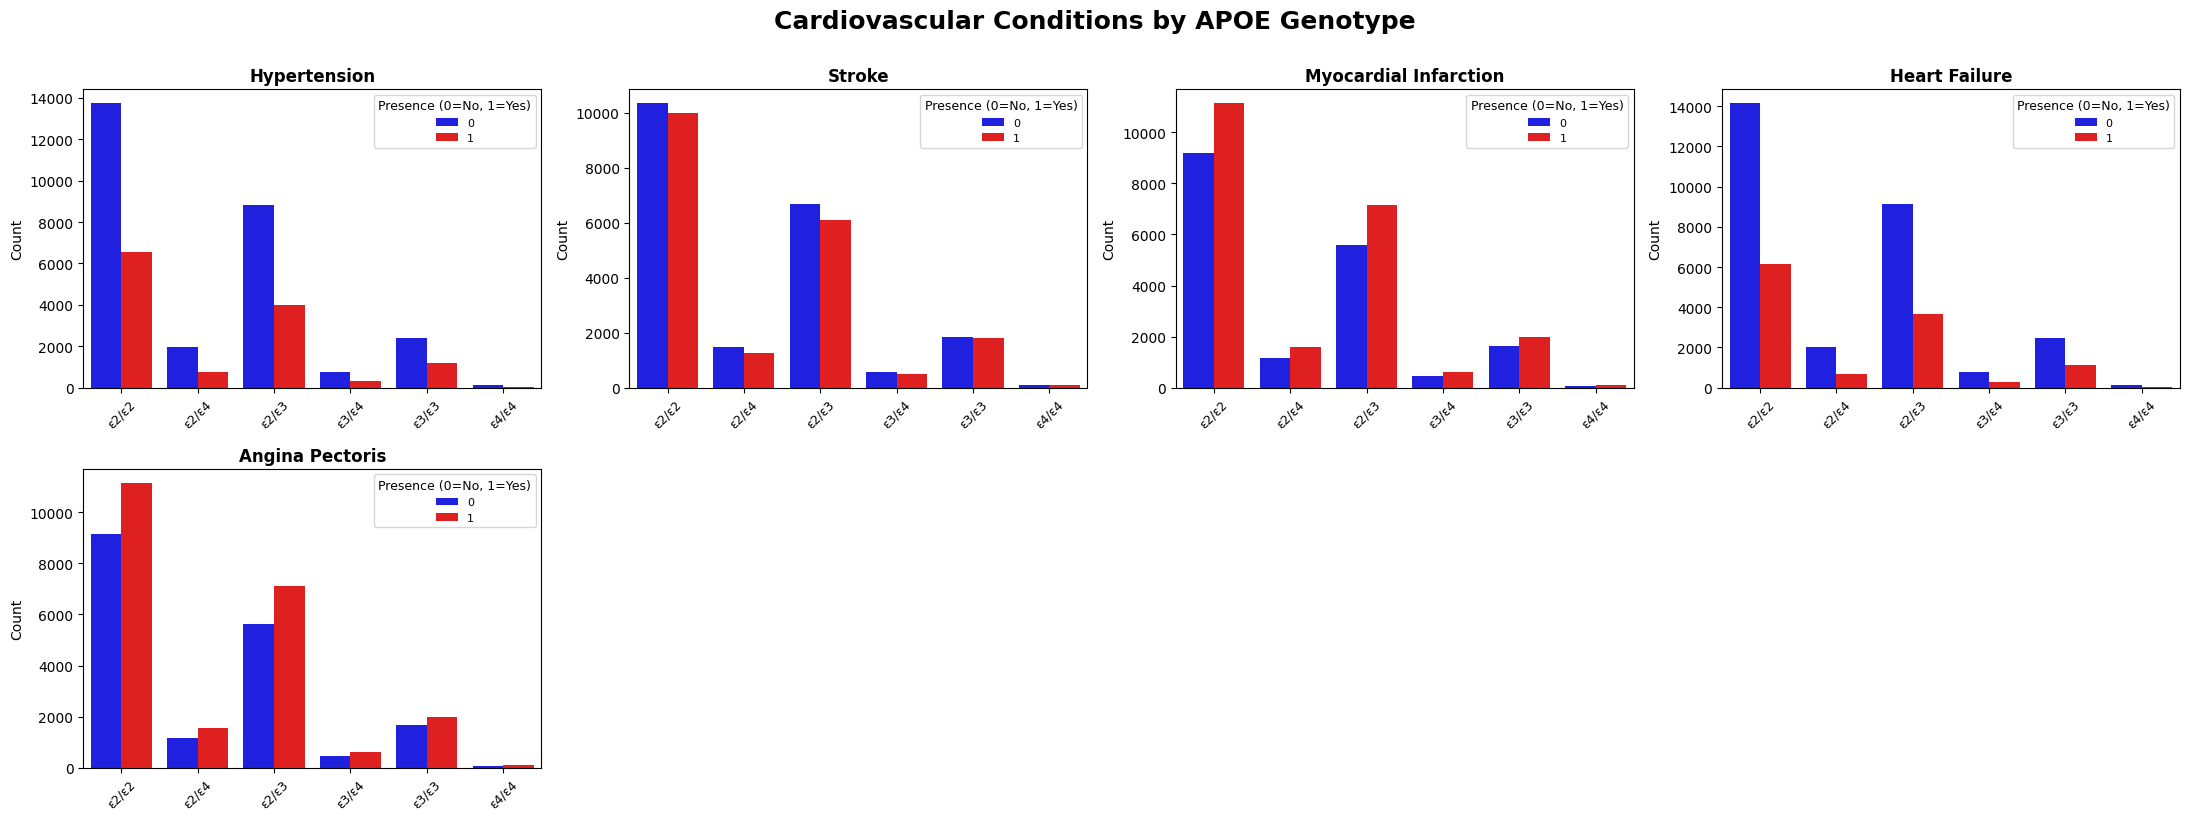

✅ High-resolution figure saved at: /content/drive/MyDrive/Cardiovascular_Conditions_by_APOE.png (5 subplots included)


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Ensure final_df is the DataFrame we are working with
# We will create a working copy to impute missing values for plotting.
plot_df = final_df.copy()

# Impute missing values in numerical columns of plot_df
# Select only numeric columns for imputation
numerical_cols_for_imputation = plot_df.select_dtypes(include=[np.number]).columns

imputer = SimpleImputer(strategy='mean')
plot_df[numerical_cols_for_imputation] = imputer.fit_transform(plot_df[numerical_cols_for_imputation])

print("✅ Missing numerical values in plot_df imputed for visualization.")

# ==========================
# Combined Multi-Panel Plot: Cardiovascular Conditions vs APOE Genotype
# ==========================

# Update cardiovascular_cols to match actual column names in final_df
cardiovascular_cols = [
    "CVHATT",   # History of Hypertension
    "STROKE",   # History of Stroke
    "MYOINF",   # Myocardial Infarction
    "CVCHF",    # Congestive Heart Failure
    "ANGINA"    # Angina
]

# Ensure only valid columns (exist + at least 1 non-NaN - already handled by imputation)
valid_conditions = [
    col for col in cardiovascular_cols
    if col in plot_df.columns
]

n_conditions = len(valid_conditions)
if n_conditions == 0:
    raise ValueError("No valid cardiovascular columns found with data.")

# Layout configuration
n_cols = 4  # Number of plots per row
n_rows = (n_conditions + n_cols - 1) // n_cols  # Auto-calculate rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 4 * n_rows))
axes = axes.flatten()

# Define custom color palette for '0' (blue) and '1' (red)
custom_palette = {0: 'blue', 1: 'red'}

# Optional mapping for nicer subplot titles
condition_names = {
    "CVHATT": "Hypertension",
    "STROKE": "Stroke",
    "MYOINF": "Myocardial Infarction",
    "CVCHF": "Heart Failure",
    "ANGINA": "Angina Pectoris"
}

# Create all binary hue columns at once to avoid fragmentation warnings
for col in valid_conditions:
    plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)

plot_index = 0
for col in valid_conditions:
    ax = axes[plot_index]

    sns.countplot(
        data=plot_df,
        x="APOE_Label",       # Use APOE_Label from plot_df
        hue=f'{col}_binary_hue', # Use the new binary hue column for consistent palette mapping
        palette=custom_palette,
        ax=ax
    )

    ax.set_title(condition_names.get(col, col.replace("_", " ").title()),
                 fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.legend(title="Presence (0=No, 1=Yes)", loc="upper right", fontsize=8, title_fontsize=9)

    plot_index += 1

# Remove unused axes
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Cardiovascular Conditions by APOE Genotype",
             fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# ====== 🔽 Save High-Resolution Figure ======
output_path = "/content/drive/MyDrive/Cardiovascular_Conditions_by_APOE.png" # Corrected path for PNG
plt.savefig(output_path, dpi=800, bbox_inches="tight")
plt.show()

print(f"✅ High-resolution figure saved at: {output_path} ({plot_index} subplots included)")

### Download Generated Plots

This cell will download all the previously saved plot images (`.png` files) from your Google Drive to your local computer. When you run this cell, your browser will typically prompt you for each download.

In [29]:
from google.colab import files
import os

# List of paths for the generated plots
# Add any other plot paths here if you have more than one
plot_paths = [
    '/content/drive/MyDrive/Cardiovascular_Conditions_by_APOE.png'
]

for path in plot_paths:
    if os.path.exists(path):
        print(f"Downloading {os.path.basename(path)}...")
        files.download(path)
    else:
        print(f"Error: File not found at {path}. Make sure the plot was generated and saved correctly.")

print("\n✅ All available plots have been queued for download.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ All available plots have been queued for download.


# Task
To address your request, I will perform the following actions:

1.  **Generate and Save Individual Plots**: I will modify the `gyazeEDo7Bd2` cell to iterate through each cardiovascular condition (Hypertension, Stroke, Myocardial Infarction, Heart Failure, Angina Pectoris) and generate a separate plot for each, saving them as individual `.png` files in Google Drive. This will include the blue/red color scheme for presence/absence of disease, as previously discussed.
2.  **Provide Separate Download Code for Hypertension Plot**: I will generate a new code cell to specifically download the 'Hypertension' plot ('Hypertension_by_APOE.png') to your local computer.
3.  **Provide Separate Download Code for Stroke Plot**: I will generate a new code cell to specifically download the 'Stroke' plot ('Stroke_by_APOE.png') to your local computer.
4.  **Provide Separate Download Code for Myocardial Infarction Plot**: I will generate a new code cell to specifically download the 'Myocardial_Infarction' plot ('Myocardial_Infarction_by_APOE.png') to your local computer.
5.  **Provide Separate Download Code for Heart Failure Plot**: I will generate a new code cell to specifically download the 'Heart Failure' plot ('Heart_Failure_by_APOE.png') to your local computer.
6.  **Provide Separate Download Code for Angina Pectoris Plot**: I will generate a new code cell to specifically download the 'Angina Pectoris' plot ('Angina_Pectoris_by_APOE.png') to your local computer.

I will confirm that all individual plots have been generated and separate download cells are available for each as requested.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Set a clean and attractive Seaborn style
sns.set_theme(style="whitegrid", palette="pastel")

# 1. Make a copy of the `final_df` DataFrame and assign it to `plot_df`.
plot_df = final_df.copy()

# 2. Identify all numerical columns in `plot_df` and impute any missing values using the mean strategy
numerical_cols_for_imputation = plot_df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
plot_df[numerical_cols_for_imputation] = imputer.fit_transform(plot_df[numerical_cols_for_imputation])

print("✅ Missing numerical values in plot_df imputed for visualization.")

# 3. Define a list of cardiovascular column names
cardiovascular_cols = [
    "CVHATT",   # History of Hypertension
    "STROKE",   # History of Stroke
    "MYOINF",   # Myocardial Infarction
    "CVCHF",    # Congestive Heart Failure
    "ANGINA"    # Angina
]

# 4. Create a dictionary `condition_names` to map column names to descriptive titles
condition_names = {
    "CVHATT": "Hypertension",
    "STROKE": "Stroke",
    "MYOINF": "Myocardial Infarction",
    "CVCHF": "Heart Failure",
    "ANGINA": "Angina Pectoris"
}

# 5. Define a `custom_palette` dictionary for coloring
# Blue for 'No' (0) and Red for 'Yes' (1)
custom_palette = {0: 'skyblue', 1: 'salmon'}

# Create all binary hue columns at once to avoid fragmentation warnings
for col in cardiovascular_cols:
    plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)

# 6. Iterate through each column in `cardiovascular_cols`
for col in cardiovascular_cols:
    # a. For each condition, create a new figure and a single subplot
    fig, ax = plt.subplots(figsize=(10, 7)) # Slightly larger figure for better detail

    # c. Generate a `countplot` with enhanced aesthetics
    sns.countplot(
        data=plot_df,
        x="APOE_Label",
        hue=f'{col}_binary_hue',
        palette=custom_palette,
        ax=ax,
        edgecolor='black' # Add black borders to bars for better distinction
    )

    # d. Set the title of the plot using the descriptive name
    title = condition_names.get(col, col.replace("_", " ").title())
    ax.set_title(f"{title} by APOE Genotype", fontsize=16, fontweight="bold", pad=20)

    # e. Set the x-axis label to an empty string and the y-axis label to 'Count'
    ax.set_xlabel("APOE Genotype", fontsize=12, fontweight='bold') # Add x-axis label
    ax.set_ylabel("Number of Participants", fontsize=12, fontweight='bold') # Use more descriptive y-label

    # f. Rotate the x-axis tick labels by 45 degrees and set their font size to 10
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # g. Add a legend with the title 'Presence (0=No, 1=Yes)'
    ax.legend(title="Condition Presence (0=No, 1=Yes)", loc="upper right", fontsize=9, title_fontsize=10, frameon=True, fancybox=True, shadow=True)

    # h. Adjust the layout
    plt.tight_layout()

    # i. Save the plot as a high-resolution PNG file to Google Drive
    output_filename = f"{title.replace(' ', '_')}_by_APOE.png"
    output_path = f"/content/drive/MyDrive/{output_filename}"
    plt.savefig(output_path, dpi=800, bbox_inches="tight")
    print(f"✅ Saved: {output_path}")

    # j. Close the plot figure to free up memory
    plt.close(fig)

# 7. Print a message confirming that all individual plots have been generated and saved
print("\n✅ All individual cardiovascular condition plots have been generated and saved to Google Drive.")

✅ Missing numerical values in plot_df imputed for visualization.


/tmp/ipython-input-1824386372.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)
/tmp/ipython-input-1824386372.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  plot_df[f'{col}_binary_hue'] = plot_df[col].apply(lambda x: 1 if x > 0 else 0)
/tmp/ipython-input-1824386372.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

✅ Saved: /content/drive/MyDrive/Hypertension_by_APOE.png
✅ Saved: /content/drive/MyDrive/Stroke_by_APOE.png
✅ Saved: /content/drive/MyDrive/Myocardial_Infarction_by_APOE.png
✅ Saved: /content/drive/MyDrive/Heart_Failure_by_APOE.png
✅ Saved: /content/drive/MyDrive/Angina_Pectoris_by_APOE.png

✅ All individual cardiovascular condition plots have been generated and saved to Google Drive.


In [39]:
from google.colab import files
import os

plot_path = '/content/drive/MyDrive/Hypertension_by_APOE.png'

if os.path.exists(plot_path):
    print(f"Downloading {os.path.basename(plot_path)}...")
    files.download(plot_path)
else:
    print(f"Error: File not found at {plot_path}. Make sure the plot was generated and saved correctly.")

print("\n✅ Download request for Hypertension_by_APOE.png completed.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download request for Hypertension_by_APOE.png completed.


In [34]:
from google.colab import files
import os

plot_path = '/content/drive/MyDrive/Stroke_by_APOE.png'

if os.path.exists(plot_path):
    print(f"Downloading {os.path.basename(plot_path)}...")
    files.download(plot_path)
else:
    print(f"Error: File not found at {plot_path}. Make sure the plot was generated and saved correctly.")

print("\n✅ Download request for Stroke_by_APOE.png completed.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download request for Stroke_by_APOE.png completed.


In [35]:
from google.colab import files
import os

plot_path = '/content/drive/MyDrive/Myocardial_Infarction_by_APOE.png'

if os.path.exists(plot_path):
    print(f"Downloading {os.path.basename(plot_path)}...")
    files.download(plot_path)
else:
    print(f"Error: File not found at {plot_path}. Make sure the plot was generated and saved correctly.")

print("\n✅ Download request for Myocardial_Infarction_by_APOE.png completed.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download request for Myocardial_Infarction_by_APOE.png completed.


In [36]:
from google.colab import files
import os

plot_path = '/content/drive/MyDrive/Heart_Failure_by_APOE.png'

if os.path.exists(plot_path):
    print(f"Downloading {os.path.basename(plot_path)}...")
    files.download(plot_path)
else:
    print(f"Error: File not found at {plot_path}. Make sure the plot was generated and saved correctly.")

print("\n✅ Download request for Heart_Failure_by_APOE.png completed.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download request for Heart_Failure_by_APOE.png completed.


In [37]:
from google.colab import files
import os

plot_path = '/content/drive/MyDrive/Angina_Pectoris_by_APOE.png'

if os.path.exists(plot_path):
    print(f"Downloading {os.path.basename(plot_path)}...")
    files.download(plot_path)
else:
    print(f"Error: File not found at {plot_path}. Make sure the plot was generated and saved correctly.")

print("\n✅ Download request for Angina_Pectoris_by_APOE.png completed.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download request for Angina_Pectoris_by_APOE.png completed.


# Summary Statistics

This step summarizes the genetic, demographic, and clinical characteristics of the filtered dataset. It reports the distribution of APOE genotypes, sex, and birth year, along with the overall dementia status of participants. Dementia proportions are further examined across APOE genotypes to provide initial insight into genotype-specific patterns. These statistics support data validation and guide subsequent analyses

In [40]:
# ==========================
# STEP 6: Summary Statistics (Using Filtered Dataset)
# ==========================

# Count APOE genotypes
print("\n🔢 APOE Genotype Distribution:")
print(filtered_df["APOE_Label"].value_counts(dropna=False))

# Basic demographic info
print("\n🧍 Sex Distribution:")
print(filtered_df["SEX"].value_counts(dropna=False))

print("\n📅 Birth Year Statistics:")
print(filtered_df["BIRTHYR"].describe())

# Dementia status distribution
print("\n🧠 Dementia Status Distribution:")
print(filtered_df["DEMENTED"].value_counts(dropna=False))

# (Optional) – Dementia proportions by APOE genotype
print("\n📊 Dementia Proportions by APOE Genotype:")
print(filtered_df.groupby("APOE_Label")["DEMENTED"]
                 .value_counts(normalize=True)
                 .unstack()
                 .fillna(0))



🔢 APOE Genotype Distribution:
APOE_Label
ε2/ε2    20314
ε2/ε3    12776
ε3/ε3     3630
ε2/ε4     2737
ε3/ε4     1051
ε4/ε4      178
Name: count, dtype: int64

🧍 Sex Distribution:
SEX
2    23027
1    17659
Name: count, dtype: int64

📅 Birth Year Statistics:
count    40686.000000
mean      1940.892912
std         12.652103
min       1896.000000
25%       1932.000000
50%       1941.000000
75%       1949.000000
max       2003.000000
Name: BIRTHYR, dtype: float64

🧠 Dementia Status Distribution:
DEMENTED
0    26044
1    14642
Name: count, dtype: int64

📊 Dementia Proportions by APOE Genotype:
DEMENTED           0         1
APOE_Label                    
ε2/ε2       0.700994  0.299006
ε2/ε3       0.554242  0.445758
ε2/ε4       0.410669  0.589331
ε3/ε3       0.763636  0.236364
ε3/ε4       0.647003  0.352997
ε4/ε4       0.825843  0.174157


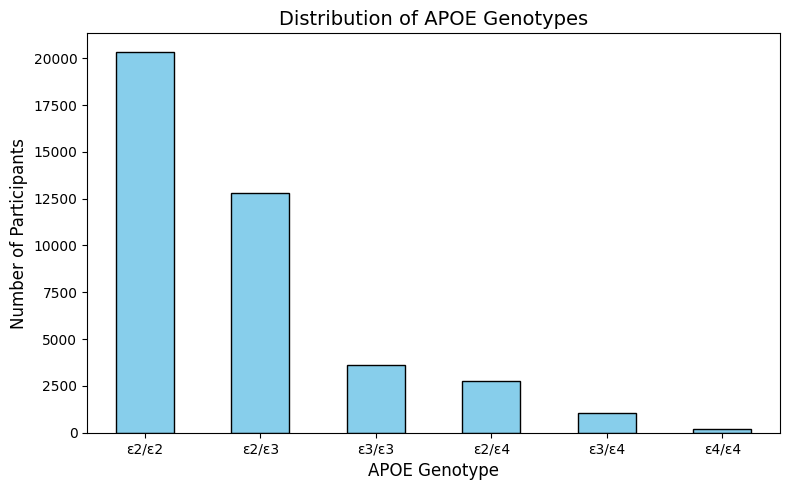

In [41]:
import matplotlib.pyplot as plt

# ==========================
# STEP 7: Plot APOE Genotype Distribution
# ==========================
plt.figure(figsize=(8,5))
filtered_df["APOE_Label"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of APOE Genotypes", fontsize=14)
plt.xlabel("APOE Genotype", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Dataset Loading

This step loads the NACC_with_APOE_embeddings.csv file into the Colab environment and verifies its availability. The dataset shape, sample column names, and first few rows are displayed to confirm successful loading and readiness for further analysis.

In [43]:
# Colab-ready analysis pipeline for /content/NACC_with_APOE_embeddings.csv
# - Load, clean, EDA, embedding PCA/UMAP, simple predictive model
# - Saves outputs to /content/
# Run in order in Colab

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML & stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Optional: umap (install if missing)
try:
    import umap
except Exception:
    !pip install --quiet umap-learn
    import umap

# ------------------------------
# 1) Load CSV
# ------------------------------
path = "/content/NACC_with_APOE_embeddings.csv"
assert os.path.exists(path), f"File not found: {path}"
df = pd.read_csv(path)
print("Loaded:", path)
print("Shape:", df.shape)
print("Columns (sample):", df.columns[:30].tolist())
display(df.head())

Loaded: /content/NACC_with_APOE_embeddings.csv
Shape: (40686, 1324)
Columns (sample): ['NACCID', 'SEX', 'BIRTHYR', 'NACCAPOE', 'DEMENTED', 'CVHATT', 'HATTMULT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'ANGINA', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT']


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211


In [44]:
# ------------------------------
# 2) Basic cleaning: missing codes -> NaN
# NACC often uses 9/99/-4/-8 etc. Convert common missing codes.
# ------------------------------
missing_codes = [9, 99, -4, -8, 98, 999]  # common codes; harmless if not present
df = df.replace(missing_codes, np.nan)

# If NACCAPOE is numeric-like, ensure numeric
if "NACCAPOE" in df.columns:
    # Try cast to numeric (some files store as string)
    df["NACCAPOE"] = pd.to_numeric(df["NACCAPOE"], errors="coerce")

# Map NACCAPOE code -> human genotype label if APOE_Label not present
if "APOE_Label" not in df.columns:
    if "NACCAPOE" in df.columns:
        apoe_map = {
            1: "ε2/ε2",
            2: "ε2/ε3",
            3: "ε3/ε3",
            4: "ε2/ε4",
            5: "ε3/ε4",
            6: "ε4/ε4"
        }
        df["APOE_Label"] = df["NACCAPOE"].map(apoe_map)
        print("Mapped NACCAPOE -> APOE_Label (1-6). Missing/other codes are NaN.")
    else:
        print("No NACCAPOE nor APOE_Label present. Please add genotype column.")
else:
    print("APOE_Label already present in file.")

# Quick counts
print("\nAPOE label counts:")
print(df["APOE_Label"].value_counts(dropna=False))

APOE_Label already present in file.

APOE label counts:
APOE_Label
ε2/ε2    20314
ε2/ε3    12776
ε3/ε3     3630
ε2/ε4     2737
ε3/ε4     1051
ε4/ε4      178
Name: count, dtype: int64


In [45]:
# ------------------------------
# 3) Auto-detect embedding columns
# ------------------------------
emb_cols = [c for c in df.columns if c.startswith("APOE_emb_") or c.startswith("apoe_emb_")]
print(f"\nDetected {len(emb_cols)} embedding columns (sample 10):", emb_cols[:10])

# ------------------------------
# 4) Create age metric if possible
# ------------------------------
if "DECAGE" in df.columns:
    df["Age"] = df["DECAGE"]
elif "Age_at_visit" in df.columns:
    df["Age"] = df["Age_at_visit"]
elif ("VISITYR" in df.columns) and ("BIRTHYR" in df.columns):
    # attempt to compute age at visit: VISITYR - BIRTHYR (coarse)
    df["Age"] = pd.to_numeric(df["VISITYR"], errors="coerce") - pd.to_numeric(df["BIRTHYR"], errors="coerce")
else:
    print("No DECAGE/VISITYR+BIRTHYR/Age_at_visit columns found; Age not created.")

if "Age" in df.columns:
    print("Age column present. Summary:")
    print(df["Age"].describe())


Detected 1280 embedding columns (sample 10): ['APOE_emb_0', 'APOE_emb_1', 'APOE_emb_2', 'APOE_emb_3', 'APOE_emb_4', 'APOE_emb_5', 'APOE_emb_6', 'APOE_emb_7', 'APOE_emb_8', 'APOE_emb_9']
No DECAGE/VISITYR+BIRTHYR/Age_at_visit columns found; Age not created.


In [46]:
# ------------------------------
# 5) Key medical columns - choose from the many column names you provided
#    We'll select a curated list and keep only those present.
# ------------------------------
candidate_medical = [
    # cardiovascular / vascular
    "NACCHT","HYPERT","HYPERTEN","HYPCHOL","CVCHF","CVANGINA","AFIBRILL","CONGHRT","ANGINA",
    "CBSTROKE","NACCSTROK","PREVSTK","STROKE","STROKIF","STKIMAG","VASC","VASCIF",
]

medical_cols = [c for c in candidate_medical if c in df.columns]
print("\nMedical columns found and included in EDA:", medical_cols)


Medical columns found and included in EDA: ['CVCHF', 'CVANGINA', 'AFIBRILL', 'CONGHRT', 'ANGINA', 'CBSTROKE', 'PREVSTK', 'STROKE', 'STROKIF', 'STKIMAG', 'VASC', 'VASCIF']


In [47]:
# ------------------------------
# 6) Convert medical cols to numeric (0/1) where possible
#    Many NACC variables encode presence as 1 (Yes); we'll coerce numerics and leave others alone.
# ------------------------------
for c in medical_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv')

# Impute missing values using mean for numeric columns
data_numeric = data.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the imputed dataset
print(data_imputed.head())

   SEX  BIRTHYR  NACCAPOE  DEMENTED  CVHATT  HATTMULT  CVAFIB  CVANGIO  \
0  2.0   1944.0       1.0       0.0     0.0  7.732141     0.0      0.0   
1  2.0   1935.0       4.0       0.0     0.0  8.000000     0.0      0.0   
2  1.0   1952.0       1.0       0.0     0.0  7.732141     0.0      0.0   
3  1.0   1926.0       2.0       1.0     0.0  7.732141     0.0      0.0   
4  1.0   1930.0       1.0       0.0     0.0  7.732141     1.0      0.0   

   CVBYPASS  CVPACDEF  ...    STROKE   STROKIF  STROKDEC   STKIMAG       CVD  \
0       0.0  0.020408  ...  0.000000  7.000000   7.85259  7.895041  0.076903   
1       0.0  0.000000  ...  0.041602  7.191406   8.00000  8.000000  0.000000   
2       0.0  0.020408  ...  0.000000  7.000000   7.85259  7.895041  0.076903   
3       0.0  0.020408  ...  0.000000  7.000000   7.85259  7.895041  0.076903   
4       0.0  0.020408  ...  0.000000  8.000000   7.85259  7.895041  0.076903   

      CVDIF      VASC    VASCIF    VASCPS  VASCPSIF  
0  7.128011  0.00000

In [52]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create a copy to work with, to avoid modifying the original 'df' directly
df_imputed = df.copy()

print("Missing values in numerical columns of 'df' BEFORE imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

# Select only numerical columns for imputation
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns

# Initialize the SimpleImputer with a mean strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the numerical columns
df_imputed[numerical_cols] = imputer.fit_transform(df_imputed[numerical_cols])

print("\nMissing values in numerical columns of 'df' AFTER imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

print("\n✅ All numerical missing values in 'df' have been imputed with the mean.")

# Display the first few rows of the imputed DataFrame
print("\nPreview of the DataFrame after imputation:")
display(df_imputed.head())

Missing values in numerical columns of 'df' BEFORE imputation (top 10):

TIAMULT     33036
STROKMUL    32982
HATTMULT    32973
CVANGINA    32948
CVHVALVE    32948
CVPACDEF    32944
VASCPSIF    25390
VASCPS      25347
STKIMAG     22012
ANGIOCP     21922
dtype: int64

Missing values in numerical columns of 'df' AFTER imputation (top 10):

APOE_emb_1279    0
SEX              0
BIRTHYR          0
NACCAPOE         0
DEMENTED         0
CVHATT           0
HATTMULT         0
CVAFIB           0
CVANGIO          0
APOE_emb_1263    0
dtype: int64

✅ All numerical missing values in 'df' have been imputed with the mean.

Preview of the DataFrame after imputation:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2.0,1944.0,1.0,0.0,0.0,7.732141,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2.0,1935.0,4.0,0.0,0.0,8.000000,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1.0,1952.0,1.0,0.0,0.0,7.732141,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1.0,1926.0,2.0,1.0,0.0,7.732141,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1.0,1930.0,1.0,0.0,0.0,7.732141,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211


In [55]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create a copy to work with, to avoid modifying the original 'df' directly
df_imputed = df.copy()

print("Missing values in numerical columns of 'df' BEFORE imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

# Select only numerical columns for imputation
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns

# Initialize the SimpleImputer with a mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to the numerical columns
df_imputed[numerical_cols] = imputer.fit_transform(df_imputed[numerical_cols])

print("\nMissing values in numerical columns of 'df' AFTER imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

print("\n✅ All numerical missing values in 'df' have been imputed with the mode.")

# Display the first few rows of the imputed DataFrame
print("\nPreview of the DataFrame after imputation:")
display(df_imputed.head())

Missing values in numerical columns of 'df' BEFORE imputation (top 10):

TIAMULT     33036
STROKMUL    32982
HATTMULT    32973
CVANGINA    32948
CVHVALVE    32948
CVPACDEF    32944
VASCPSIF    25390
VASCPS      25347
STKIMAG     22012
ANGIOCP     21922
dtype: int64

Missing values in numerical columns of 'df' AFTER imputation (top 10):

APOE_emb_1279    0
SEX              0
BIRTHYR          0
NACCAPOE         0
DEMENTED         0
CVHATT           0
HATTMULT         0
CVAFIB           0
CVANGIO          0
APOE_emb_1263    0
dtype: int64

✅ All numerical missing values in 'df' have been imputed with the mode.

Preview of the DataFrame after imputation:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2.0,1944.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2.0,1935.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1.0,1952.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1.0,1926.0,2.0,1.0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1.0,1930.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211



=== Dataset Overview ===
Rows,Cols: (40686, 1324)

Missing values (top 30 cols):
CVOTHRX     37339
TIAMULT     33036
STROKMUL    32982
HATTMULT    32973
CVANGINA    32948
CVHVALVE    32948
CVPACDEF    32944
VASCPSIF    25390
VASCPS      25347
STKIMAG     22012
CVD         21922
CVDIF       21922
HVALVE      21922
PACEMAKE    21922
ANGIOCP     21922
ANGINA      21922
AFIBRILL    21922
ANGIOPCI    21922
CONGHRT     21922
MYOINF      21922
PREVSTK     21922
STROKDEC    21922
HXSTROKE    19938
CVPACE      18785
STROKIF     18764
VASC        18764
VASCIF      18764
STROKE      18764
CBTIA       11296
CVAFIB      11150
dtype: int64


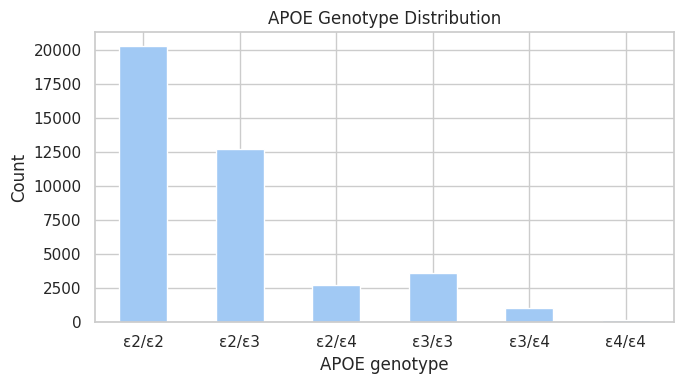

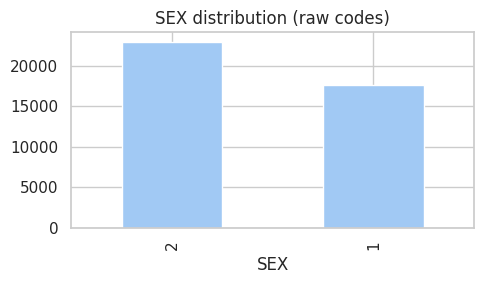

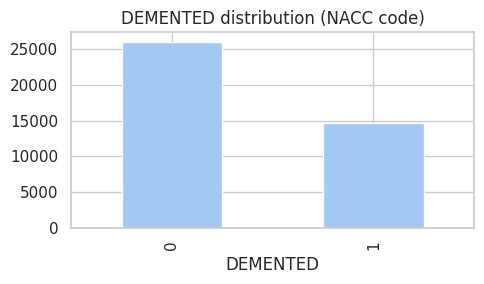

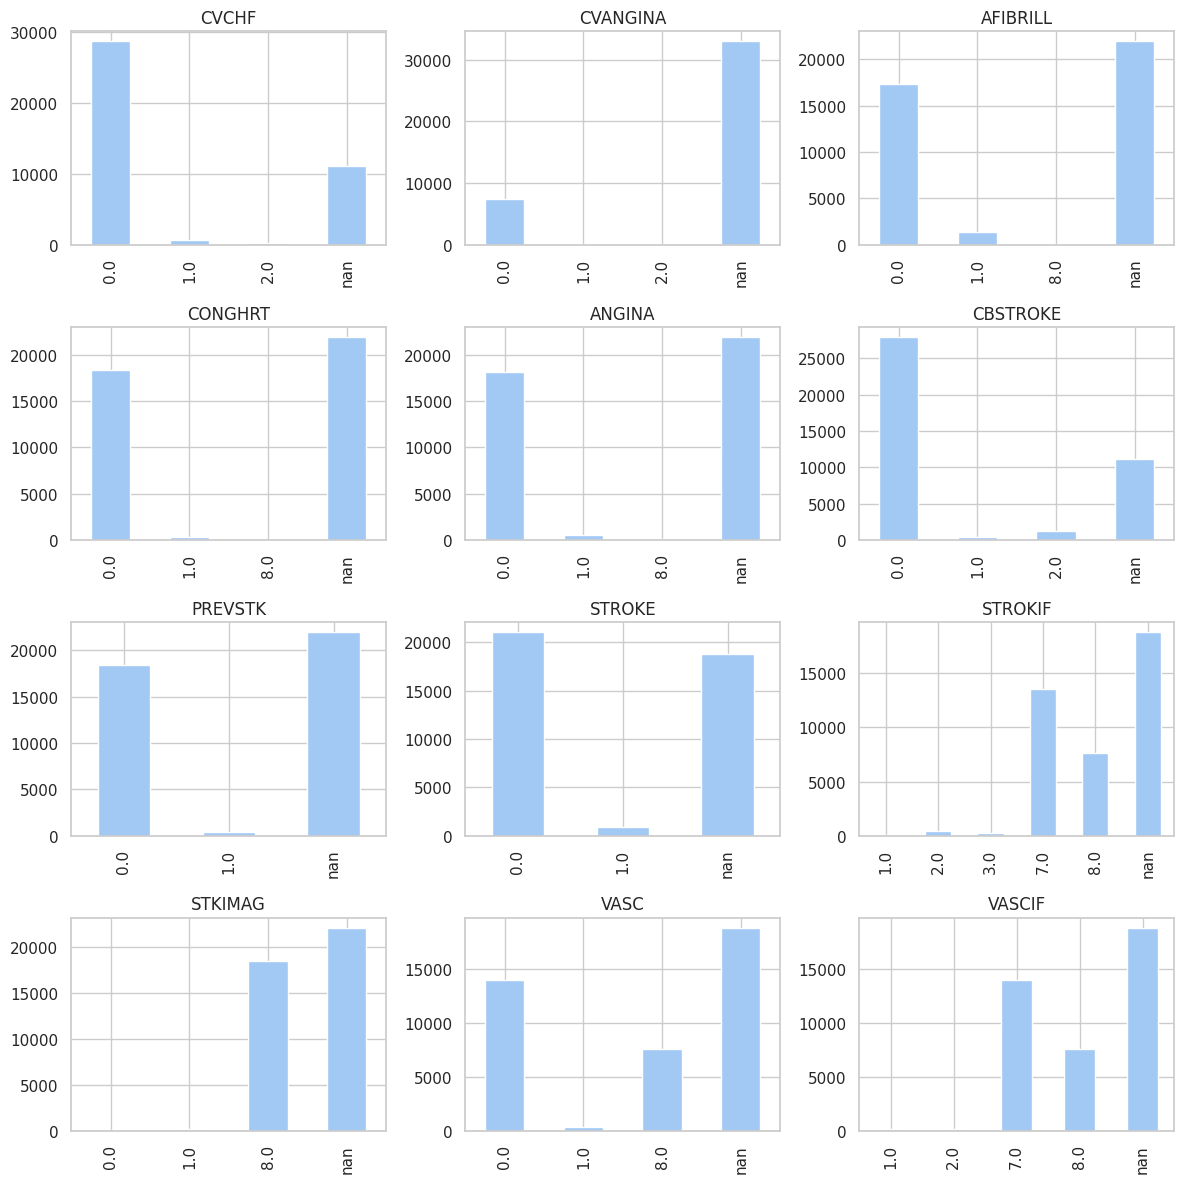

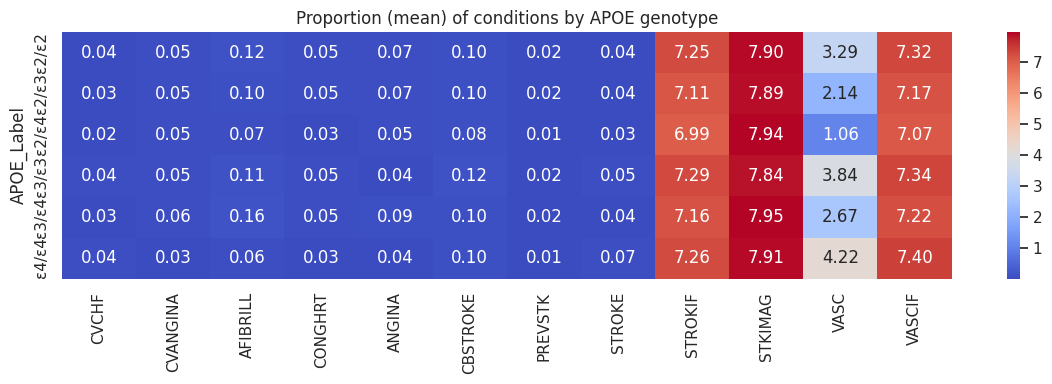


Contingency table (APOE_Label x DEMENTED):
 DEMENTED        0     1
APOE_Label             
ε2/ε2       14240  6074
ε2/ε3        7081  5695
ε2/ε4        1124  1613
ε3/ε3        2772   858
ε3/ε4         680   371
ε4/ε4         147    31
Chi-square test: chi2=1628.572, p=0, dof=5


In [56]:
# ------------------------------
# 7) EDA: Missingness, distributions, and plots
# ------------------------------
print("\n=== Dataset Overview ===")
print("Rows,Cols:", df.shape)
print("\nMissing values (top 30 cols):")
print(df.isna().sum().sort_values(ascending=False).head(30))

# APOE genotype barplot
plt.figure(figsize=(7,4))
ax = df["APOE_Label"].value_counts(dropna=False).sort_index().plot(kind="bar")
ax.set_title("APOE Genotype Distribution")
ax.set_xlabel("APOE genotype")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Sex distribution if present
if "SEX" in df.columns:
    plt.figure(figsize=(5,3))
    df["SEX"].value_counts(dropna=False).plot(kind="bar")
    plt.title("SEX distribution (raw codes)")
    plt.tight_layout(); plt.show()

# Age histogram
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    df["Age"].dropna().hist(bins=25)
    plt.title("Age distribution")
    plt.xlabel("Age (years)")
    plt.tight_layout(); plt.show()

# Dementia distribution
if "DEMENTED" in df.columns:
    plt.figure(figsize=(5,3))
    df["DEMENTED"].value_counts(dropna=False).plot(kind="bar")
    plt.title("DEMENTED distribution (NACC code)")
    plt.tight_layout(); plt.show()

# Medical conditions - bar plots (presence)
if medical_cols:
    n = len(medical_cols)
    cols = 3
    rows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()
    for i, col in enumerate(medical_cols):
        vals = df[col].value_counts(dropna=False).sort_index()
        vals.plot(kind="bar", ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")
    # hide empty axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Proportions of medical conditions by APOE genotype (if APOE_Label exists)
if "APOE_Label" in df.columns and medical_cols:
    prev = pd.DataFrame()
    for m in medical_cols:
        # compute proportion of positive (assumes 1=presence)
        prev[m] = df.groupby("APOE_Label")[m].mean()
    plt.figure(figsize=(max(8, len(medical_cols)), 4))
    sns.heatmap(prev.fillna(0), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Proportion (mean) of conditions by APOE genotype")
    plt.tight_layout()
    plt.show()

# Cross-tab dementia by APOE genotype
if ("APOE_Label" in df.columns) and ("DEMENTED" in df.columns):
    ct = pd.crosstab(df["APOE_Label"], df["DEMENTED"])
    print("\nContingency table (APOE_Label x DEMENTED):\n", ct)
    try:
        from scipy.stats import chi2_contingency
        chi2, p, dof, exp = chi2_contingency(ct.fillna(0))
        print(f"Chi-square test: chi2={chi2:.3f}, p={p:.4g}, dof={dof}")
    except Exception as e:
        print("Chi2 test skipped:", e)

### Impute Missing Values in `df` DataFrame

This step will impute any remaining `NaN` values in the numerical columns of the `df` DataFrame using the mean of each respective column. This is a crucial step to prepare the data for machine learning models that do not handle missing values.

In [54]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create a copy to work with, to avoid modifying the original 'df' directly
df_imputed = df.copy()

print("Missing values in numerical columns of 'df' BEFORE imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

# Select only numerical columns for imputation
numerical_cols = df_imputed.select_dtypes(include=[np.number]).columns

# Initialize the SimpleImputer with a mode strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to the numerical columns
df_imputed[numerical_cols] = imputer.fit_transform(df_imputed[numerical_cols])

print("\nMissing values in numerical columns of 'df' AFTER imputation (top 10):\n")
print(df_imputed.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False).head(10))

print("\n✅ All numerical missing values in 'df' have been imputed with the mode.")

# Display the first few rows of the imputed DataFrame
print("\nPreview of the DataFrame after imputation:")
display(df_imputed.head())

Missing values in numerical columns of 'df' BEFORE imputation (top 10):

TIAMULT     33036
STROKMUL    32982
HATTMULT    32973
CVANGINA    32948
CVHVALVE    32948
CVPACDEF    32944
VASCPSIF    25390
VASCPS      25347
STKIMAG     22012
ANGIOCP     21922
dtype: int64

Missing values in numerical columns of 'df' AFTER imputation (top 10):

APOE_emb_1279    0
SEX              0
BIRTHYR          0
NACCAPOE         0
DEMENTED         0
CVHATT           0
HATTMULT         0
CVAFIB           0
CVANGIO          0
APOE_emb_1263    0
dtype: int64

✅ All numerical missing values in 'df' have been imputed with the mode.

Preview of the DataFrame after imputation:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2.0,1944.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2.0,1935.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1.0,1952.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1.0,1926.0,2.0,1.0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1.0,1930.0,1.0,0.0,0.0,8.0,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211



=== Dataset Overview ===
Rows,Cols: (40686, 1324)

Missing values (top 30 cols):
CVOTHRX         37339
CVPACE          18785
APOE_emb_842        0
APOE_emb_841        0
APOE_emb_840        0
APOE_emb_839        0
APOE_emb_838        0
APOE_emb_837        0
APOE_emb_836        0
APOE_emb_824        0
APOE_emb_834        0
APOE_emb_833        0
APOE_emb_832        0
APOE_emb_831        0
APOE_emb_830        0
APOE_emb_829        0
APOE_emb_828        0
APOE_emb_827        0
APOE_emb_826        0
APOE_emb_825        0
APOE_emb_835        0
APOE_emb_864        0
APOE_emb_863        0
APOE_emb_862        0
APOE_emb_861        0
APOE_emb_860        0
APOE_emb_859        0
APOE_emb_858        0
APOE_emb_857        0
APOE_emb_856        0
dtype: int64


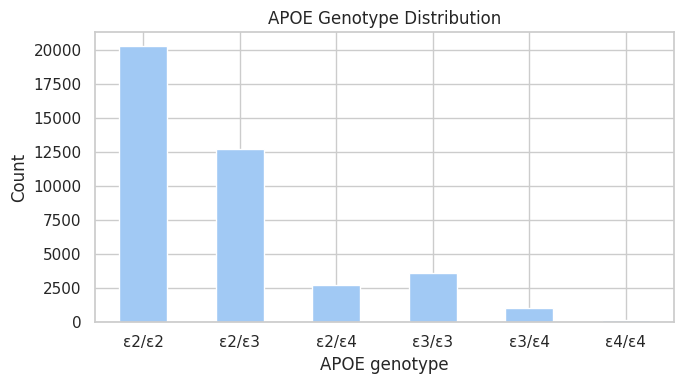

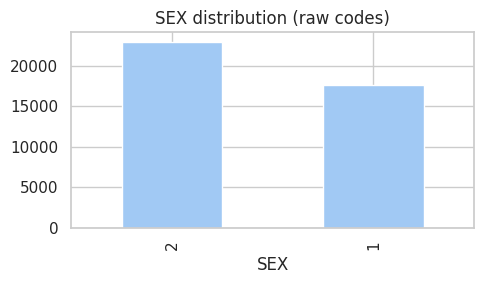

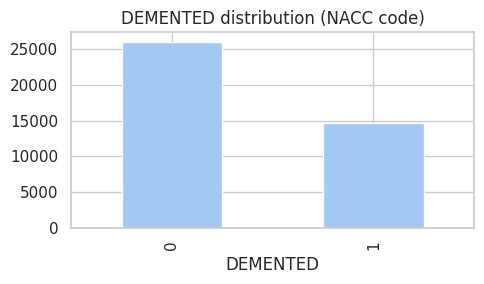

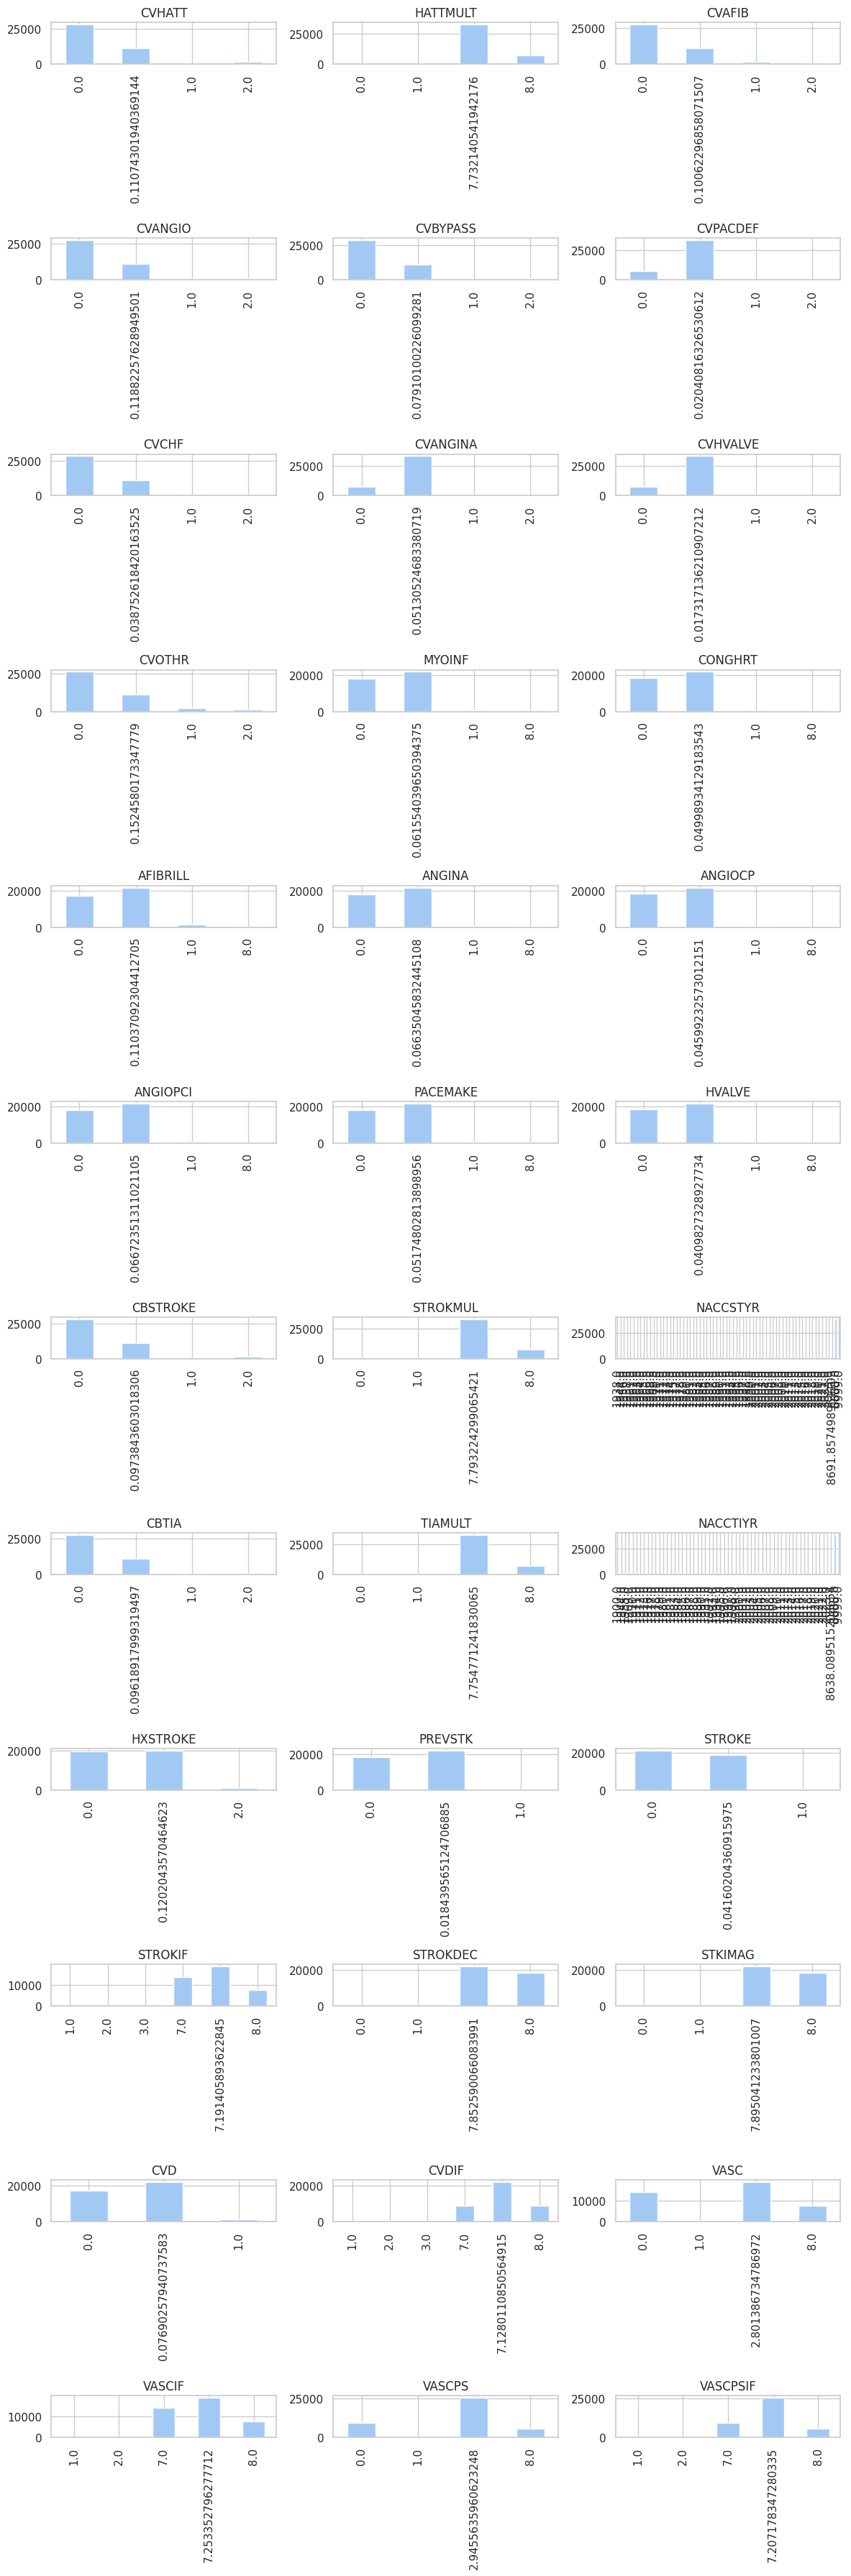

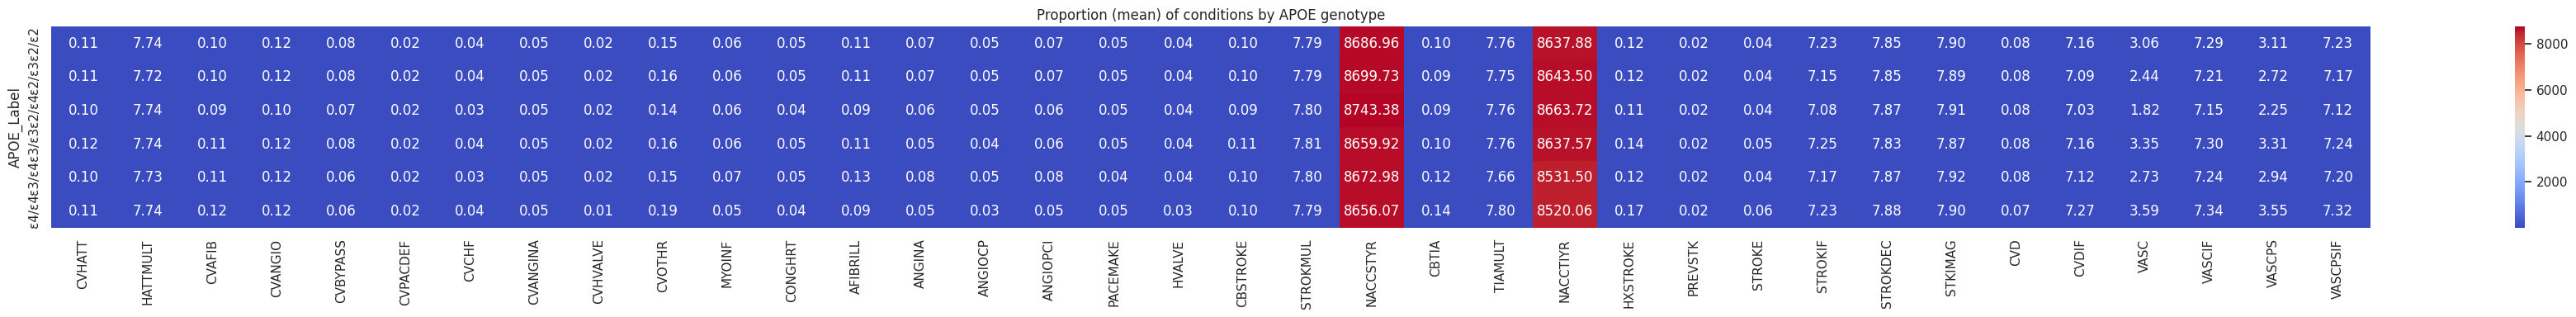


Contingency table (APOE_Label x DEMENTED):
 DEMENTED        0     1
APOE_Label             
ε2/ε2       14240  6074
ε2/ε3        7081  5695
ε2/ε4        1124  1613
ε3/ε3        2772   858
ε3/ε4         680   371
ε4/ε4         147    31
Chi-square test: chi2=1628.572, p=0, dof=5


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load your DataFrame (df)
# df = pd.read_csv('path/to/your/data.csv') # Uncomment this line to load your dataset

# Impute missing values for relevant columns
imputer = SimpleImputer(strategy='mean')

# Impute Age column if it exists
if "Age" in df.columns:
    df["Age"] = imputer.fit_transform(df[["Age"]])

# Impute medical condition columns (if they are numeric)
medical_cols = ['CVHATT', 'HATTMULT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'ANGINA', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT', 'NACCTIYR', 'HXSTROKE', 'PREVSTK', 'STROKE', 'STROKIF', 'STROKDEC', 'STKIMAG', 'CVD', 'CVDIF', 'VASC', 'VASCIF', 'VASCPS', 'VASCPSIF']

for col in medical_cols:
    if col in df.columns:
        df[col] = imputer.fit_transform(df[[col]])

# EDA: Missingness, distributions, and plots
print("\n=== Dataset Overview ===")
print("Rows,Cols:", df.shape)
print("\nMissing values (top 30 cols):")
print(df.isna().sum().sort_values(ascending=False).head(30))

# APOE genotype barplot
plt.figure(figsize=(7, 4))
ax = df["APOE_Label"].value_counts(dropna=False).sort_index().plot(kind="bar")
ax.set_title("APOE Genotype Distribution")
ax.set_xlabel("APOE genotype")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Sex distribution if present
if "SEX" in df.columns:
    plt.figure(figsize=(5, 3))
    df["SEX"].value_counts(dropna=False).plot(kind="bar")
    plt.title("SEX distribution (raw codes)")
    plt.tight_layout(); plt.show()

# Age histogram
if "Age" in df.columns:
    plt.figure(figsize=(6, 4))
    df["Age"].hist(bins=25)
    plt.title("Age distribution")
    plt.xlabel("Age (years)")
    plt.tight_layout(); plt.show()

# Dementia distribution
if "DEMENTED" in df.columns:
    plt.figure(figsize=(5, 3))
    df["DEMENTED"].value_counts(dropna=False).plot(kind="bar")
    plt.title("DEMENTED distribution (NACC code)")
    plt.tight_layout(); plt.show()

# Medical conditions - bar plots (presence)
if medical_cols:
    n = len(medical_cols)
    cols = 3
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()
    for i, col in enumerate(medical_cols):
        vals = df[col].value_counts(dropna=False).sort_index()
        vals.plot(kind="bar", ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")
    # hide empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Proportions of medical conditions by APOE genotype (if APOE_Label exists)
if "APOE_Label" in df.columns and medical_cols:
    prev = pd.DataFrame()
    for m in medical_cols:
        # compute proportion of positive (assumes 1=presence)
        prev[m] = df.groupby("APOE_Label")[m].mean()
    plt.figure(figsize=(max(8, len(medical_cols)), 4))
    sns.heatmap(prev.fillna(0), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Proportion (mean) of conditions by APOE genotype")
    plt.tight_layout()
    plt.show()

# Cross-tab dementia by APOE genotype
if ("APOE_Label" in df.columns) and ("DEMENTED" in df.columns):
    ct = pd.crosstab(df["APOE_Label"], df["DEMENTED"])
    print("\nContingency table (APOE_Label x DEMENTED):\n", ct)
    try:
        from scipy.stats import chi2_contingency
        chi2, p, dof, exp = chi2_contingency(ct.fillna(0))
        print(f"Chi-square test: chi2={chi2:.3f}, p={p:.4g}, dof={dof}")
    except Exception as e:
        print("Chi2 test skipped:", e)